# Classification

In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv('apple_quality.csv')

In [67]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


## Data cleaning

In [68]:
df.drop(df.index[-1], inplace=True)

In [69]:
df.drop('A_id', axis=1, inplace=True)

In [70]:
df.isna().sum().sum()

0

In [71]:
x = df.iloc[:, 0:-1]

In [72]:
x

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [73]:
ones = np.ones((len(df), 1))

In [74]:
x.insert(0, "x0", ones)
x

,x0,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,1.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,1.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,1.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...,...
3995,1.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,1.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,1.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,1.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [75]:
x  = x.to_numpy()

In [76]:
replace_string = {"bad": 0, "good": 1}

In [77]:
y = df.iloc[:, -1]

In [78]:
y.replace(replace_string, inplace=True)
y

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

In [79]:
y = y.to_numpy()
y = y.reshape((len(df), 1))

In [80]:
x.shape

(4000, 8)

In [81]:
initial_theta = np.zeros((x.shape[1], 1))

In [82]:
initial_theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [83]:
x.shape

(4000, 8)

In [84]:
y.shape

(4000, 1)

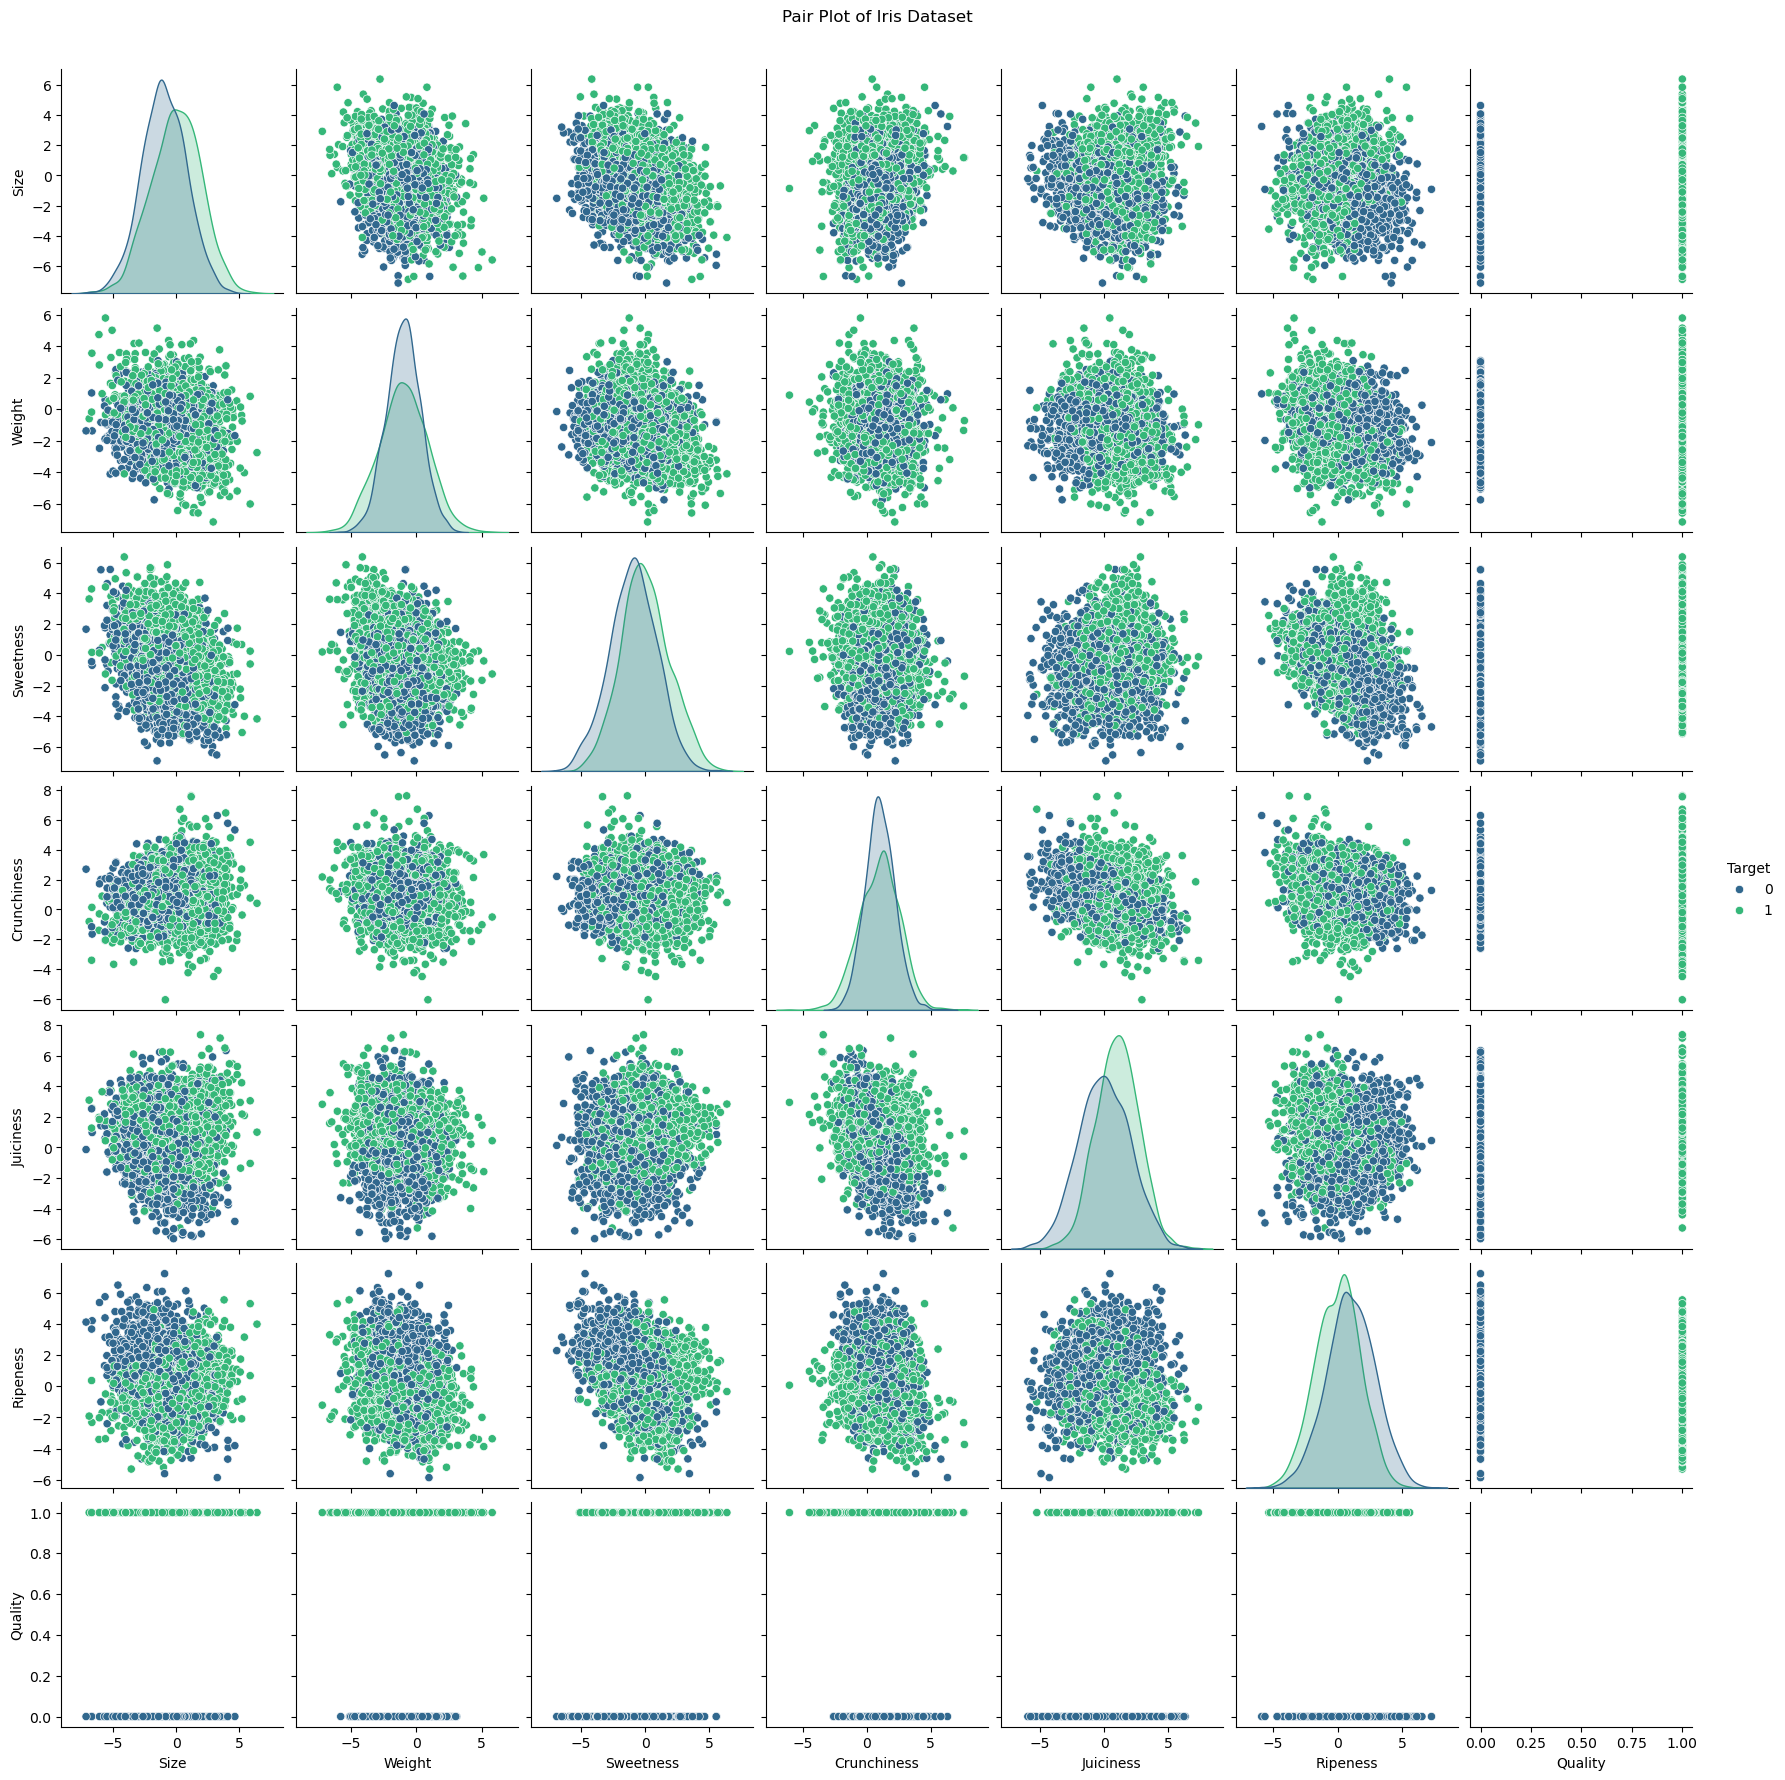

In [85]:
import seaborn as sns
from sklearn.datasets import load_iris
df['Target'] = y

# Pair plot
sns.pairplot(df, hue='Target', palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()


In [58]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Plot data

In [56]:
import matplotlib.pyplot as plt

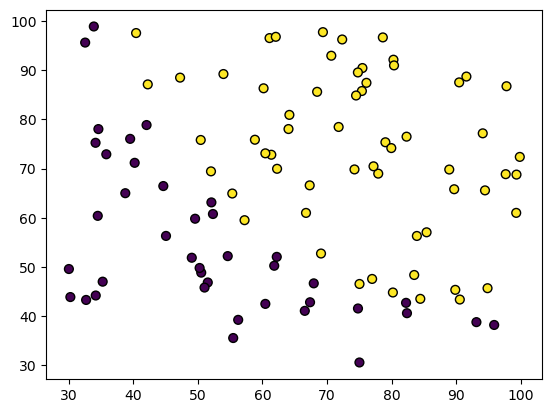

In [146]:
plt.scatter(x[:, 1], x[:, 2], marker="o", c=y, s=40, edgecolor="k")

## Hypothesis

In [48]:
#1/(1 + e^-z) where z is theta * x 
import math

In [49]:
def hypothesis(theta, x):
    hyp = np.matmul(x, theta)
    return 1/(1 + np.exp(-hyp))

## Cost Function

In [50]:
def cost(theta, x, y, total_examples):
    hyp = hypothesis(theta, x)
    res_cost = (-1/total_examples) * sum((y - np.log(hyp)) + ((1- y)* np.log(1- hyp)))
    return res_cost

In [51]:
cost(initial_theta, x, y, len(x))

array([-1.01588831])

In [52]:
initial_theta.shape

(3, 1)

In [53]:
x.shape

(100, 3)

## Gradient Descent

In [123]:
def gradient(x_values, y, m, theta, alpha, iterations):
    cost_history = []
    while True:
        prev_cost = cost(theta, x_values, y, m) 
        hyp = hypothesis(theta, x_values)
        theta -= (alpha/m) * (np.matmul(np.transpose(x_values), hyp-y))
        new_cost = cost(theta, x_values, y, m)
        cost_history.append(new_cost)
        if round(prev_cost[0], 8) == round(new_cost[0], 8):
            return theta, cost_history

In [124]:
theta, cost_history = gradient(x, y, len(x), initial_theta, 0.001, 100)

In [125]:
len(cost_history)

6309235

In [135]:
theta

array([[-24.58228967],
       [  0.20160041],
       [  0.19678601]])

In [136]:
hyp_arr = hypothesis(theta, x[:, :])

In [137]:
hyp_arr


array([[9.55240364e-02],
       [5.33515048e-05],
       [4.70072790e-02],
       [9.89385494e-01],
       [9.97928609e-01],
       [1.19948744e-02],
       [9.98805625e-01],
       [4.26513155e-01],
       [9.99651806e-01],
       [7.32268777e-01],
       [9.05991004e-01],
       [3.11525379e-02],
       [9.99143181e-01],
       [9.99821601e-01],
       [1.61330211e-01],
       [9.79225891e-01],
       [4.30666135e-01],
       [1.54663165e-01],
       [9.99647413e-01],
       [5.74185470e-01],
       [7.10906002e-02],
       [9.98414042e-01],
       [8.32348820e-03],
       [1.25220706e-04],
       [9.90987009e-01],
       [8.50385874e-01],
       [5.99733064e-01],
       [8.61169574e-01],
       [9.72995879e-02],
       [1.84727136e-02],
       [8.92771992e-01],
       [9.79413705e-01],
       [1.60479253e-01],
       [3.94962561e-01],
       [7.82981128e-02],
       [3.58166761e-02],
       [8.46993252e-01],
       [9.86311172e-01],
       [2.10206812e-01],
       [5.28938978e-02],


In [138]:
hyp_arr[hyp_arr >= 0.5] = 1
hyp_arr[hyp_arr < 0.5] = 0

In [139]:
hyp_arr

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [140]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

## Model accuracy

In [141]:
# Mean squared error mathematically calculating the accuracy of model by comparing actual outputs vs predicted ones

mse = (1/(len(x))) * sum((y - hyp_arr)** 2)
mse

array([0.11])

In [142]:
model_accuracy = f'{1 - mse[0]:.1%}'

In [143]:
model_accuracy

'89.0%'

In [144]:
len(hyp_arr[hyp_arr != y])

11

## Plot hypothesis line

In [189]:
theta

array([[-24.58228967],
       [  0.20160041],
       [  0.19678601]])

In [196]:
x1 = x[:, 1:]
x2 = (-theta[0] - ( theta[1]* x1)) / theta[2]

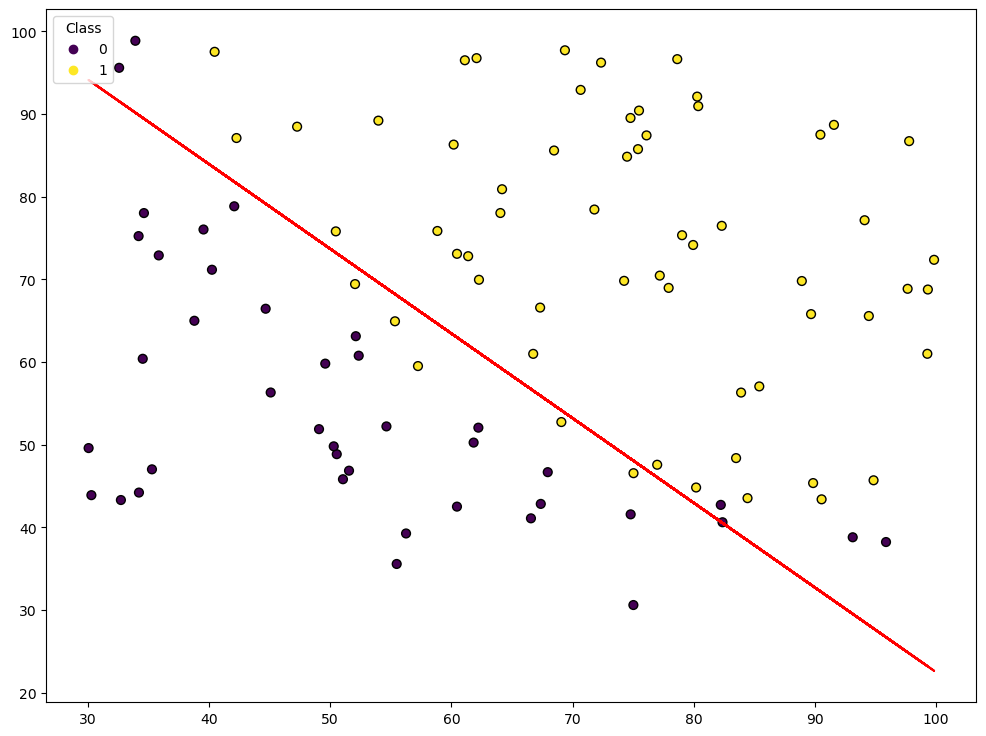

In [197]:
# Plotting the decision boundary
plt.figure(figsize=(12,9))
scatter = plt.scatter(x[:, 1], x[:, 2], marker="o", c=y, s=40, edgecolor="k")
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.show()